# TP3 : Apprentissage semi-supervisé

*Jordan Dutel et Ariane Paradan*

---
---

# I. Partie 1

In [266]:
import importlib
import function_TAA as taa
importlib.reload(taa)

import pandas as pd


In [267]:
data = pd.read_table('Wave.txt', sep=' ', header=None)
data


,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,40
0,-0.23,-1.21,1.20,1.23,-0.10,0.12,2.49,1.19,1.34,0.58,...,-0.86,-0.70,0.51,0.34,-0.13,-0.87,0.56,-0.53,0.29,2
1,0.38,0.38,-0.31,-0.09,1.52,1.35,1.49,3.81,2.33,1.34,...,1.28,1.40,0.00,-0.18,0.71,0.04,0.91,-0.79,0.22,0
2,-0.69,1.00,1.08,1.48,2.44,3.39,3.09,4.08,5.48,3.61,...,0.29,1.12,0.60,0.28,2.17,0.18,-0.09,-1.33,1.00,1
3,0.40,0.68,0.27,1.39,1.03,-0.32,-1.23,-0.50,0.11,0.87,...,0.43,-0.30,-0.07,-0.99,-0.75,1.11,1.35,-1.63,0.10,0
4,-0.81,1.59,-0.69,1.16,4.22,4.98,4.52,2.54,5.60,4.66,...,0.62,0.14,1.33,-1.87,1.48,-0.02,-0.58,0.93,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.44,0.56,1.84,1.94,3.43,4.88,4.04,2.11,1.83,0.78,...,-2.56,-0.68,0.97,-0.78,-1.14,0.45,0.18,1.44,1.11,0
4996,1.18,-0.48,1.81,1.51,1.41,3.61,3.75,3.80,3.44,3.71,...,0.37,-1.96,-1.19,-1.08,1.37,-1.02,0.71,-0.10,0.36,1
4997,0.64,0.81,-0.38,-0.88,1.55,0.10,0.42,-0.93,-0.70,1.54,...,1.61,-0.81,-1.35,-0.84,-0.64,1.19,-0.38,-0.70,-0.85,2
4998,0.18,1.65,1.91,2.07,4.28,3.61,4.46,4.62,4.80,0.25,...,-0.65,-0.73,0.89,-0.97,-1.30,-0.20,-0.63,-0.92,0.63,0


In [268]:
taa.get_info(data)

### Infos générale ###

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 41 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       5000 non-null   float64
 1   1       5000 non-null   float64
 2   2       5000 non-null   float64
 3   3       5000 non-null   float64
 4   4       5000 non-null   float64
 5   5       5000 non-null   float64
 6   6       5000 non-null   float64
 7   7       5000 non-null   float64
 8   8       5000 non-null   float64
 9   9       5000 non-null   float64
 10  10      5000 non-null   float64
 11  11      5000 non-null   float64
 12  12      5000 non-null   float64
 13  13      5000 non-null   float64
 14  14      5000 non-null   float64
 15  15      5000 non-null   float64
 16  16      5000 non-null   float64
 17  17      5000 non-null   float64
 18  18      5000 non-null   float64
 19  19      5000 non-null   float64
 20  20      5000 non-null   float64
 21  21      5000 

In [269]:
data.rename(columns={40: 'Label'}, inplace=True)
data

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,Label
0,-0.23,-1.21,1.20,1.23,-0.10,0.12,2.49,1.19,1.34,0.58,...,-0.86,-0.70,0.51,0.34,-0.13,-0.87,0.56,-0.53,0.29,2
1,0.38,0.38,-0.31,-0.09,1.52,1.35,1.49,3.81,2.33,1.34,...,1.28,1.40,0.00,-0.18,0.71,0.04,0.91,-0.79,0.22,0
2,-0.69,1.00,1.08,1.48,2.44,3.39,3.09,4.08,5.48,3.61,...,0.29,1.12,0.60,0.28,2.17,0.18,-0.09,-1.33,1.00,1
3,0.40,0.68,0.27,1.39,1.03,-0.32,-1.23,-0.50,0.11,0.87,...,0.43,-0.30,-0.07,-0.99,-0.75,1.11,1.35,-1.63,0.10,0
4,-0.81,1.59,-0.69,1.16,4.22,4.98,4.52,2.54,5.60,4.66,...,0.62,0.14,1.33,-1.87,1.48,-0.02,-0.58,0.93,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.44,0.56,1.84,1.94,3.43,4.88,4.04,2.11,1.83,0.78,...,-2.56,-0.68,0.97,-0.78,-1.14,0.45,0.18,1.44,1.11,0
4996,1.18,-0.48,1.81,1.51,1.41,3.61,3.75,3.80,3.44,3.71,...,0.37,-1.96,-1.19,-1.08,1.37,-1.02,0.71,-0.10,0.36,1
4997,0.64,0.81,-0.38,-0.88,1.55,0.10,0.42,-0.93,-0.70,1.54,...,1.61,-0.81,-1.35,-0.84,-0.64,1.19,-0.38,-0.70,-0.85,2
4998,0.18,1.65,1.91,2.07,4.28,3.61,4.46,4.62,4.80,0.25,...,-0.65,-0.73,0.89,-0.97,-1.30,-0.20,-0.63,-0.92,0.63,0


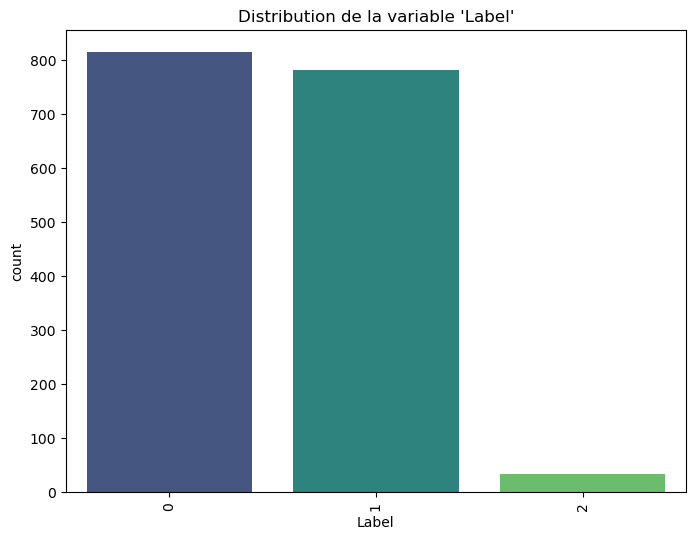


Comptage des occurrences des classes pour 'Label':

Label
0    1692
2    1655
1    1653
Name: count, dtype: int64

Pourcentage des classes pour 'Label':

Label
0    33.84
2    33.10
1    33.06
Name: proportion, dtype: float64


In [270]:
taa.plot_class_distribution(data, 'Label')

Les comptages ne sont pas raccord avec le graphique ???

In [271]:
X, y = taa.split_feature_label(data, 'Label')

Les features sont dans le dataframe X (5000 lignes, 40 colonnes).
La target est dans la série y (5000 lignes, 1 colonnes).


In [272]:
from sklearn.model_selection import train_test_split

A, T = train_test_split(
    data, test_size=0.5, stratify=y, random_state=42
)


In [273]:
T

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,Label
4585,-1.84,-0.87,-0.00,1.68,-0.18,-0.02,1.97,0.09,0.07,1.10,...,0.96,1.21,0.84,-0.50,0.32,1.02,0.39,-1.20,-0.91,0
2221,2.37,-0.92,-1.58,-0.31,-0.24,1.13,-0.24,2.72,4.57,3.64,...,-0.82,1.16,0.45,2.92,-0.01,-0.02,1.85,-0.86,1.38,2
2590,-0.17,1.99,-0.70,2.11,1.58,3.41,3.35,3.01,3.10,3.13,...,-0.65,-1.68,1.39,-0.76,-0.40,-1.39,1.56,0.66,-0.96,1
1024,1.26,0.15,0.20,2.93,0.73,2.44,1.26,1.81,1.96,-0.80,...,-0.63,0.54,0.42,-0.44,0.54,0.74,0.27,0.77,-2.12,0
2236,-0.92,1.32,1.56,1.89,2.31,3.16,6.64,3.65,5.09,4.12,...,0.42,-0.46,0.40,0.12,-0.29,-0.63,-1.43,1.25,1.47,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1405,0.50,-1.80,1.11,-1.15,-0.07,-0.38,0.14,0.55,1.37,2.12,...,1.48,-1.57,-0.63,0.89,0.27,-0.21,-0.48,-1.07,-0.85,2
1539,-1.04,0.93,-0.07,0.16,0.46,0.88,1.07,-0.92,1.02,0.43,...,-0.79,-0.92,0.17,0.02,0.42,0.38,0.76,0.51,-0.56,0
1682,0.03,-0.73,1.81,1.47,1.52,3.91,5.50,3.09,3.78,3.36,...,1.79,-0.47,0.23,-0.17,-1.50,-0.02,-2.04,-0.34,0.28,1
4343,-1.52,-0.60,1.44,0.98,1.27,3.88,0.67,0.01,2.10,2.28,...,-0.85,-0.84,-1.58,-0.14,-1.35,-0.21,-1.87,-0.40,1.18,0


# II. Partie 2

In [274]:
# POur etre en semi supervisé, on doit avoir des données partiellement labellisées entre 5 et 30% (selon le prof)
A_partial_labeled = taa.partial_labeling(A, 'Label', 30, random_seed=42)

Avant étiquetage, le dataset contient 3 classes uniques.
Répartition initiale des classes :
Label
0    846
2    828
1    826
Name: count, dtype: int64

Le dataset a été partiellement étiqueté avec 30% des données labélisées.
Après étiquetage, le dataset contient maintenant 4 classes (y compris NaN).
Répartition des classes après étiquetage :
Label
NaN    1750
1.0     256
0.0     250
2.0     244
Name: count, dtype: int64



In [275]:
A_partial_labeled['Label']



1011    NaN
261     NaN
3043    NaN
398     NaN
4096    NaN
       ... 
2045    1.0
415     NaN
4000    1.0
4487    1.0
2604    2.0
Name: Label, Length: 2500, dtype: float64

## III. Partie 3 : Séléction de variable

In [276]:
import numpy as np
import pandas as pd

def compute_scores(A, label_column, t=10):
    """
    Calcule la pertinence des variables selon une méthode semi-supervisée.

    Parameters:
        A (pd.DataFrame): La base de données contenant les variables et les étiquettes.
        label_column (str): Le nom de la colonne contenant les étiquettes (NaN pour non labélisées).
        t (float): Paramètre pour le calcul de \( S_{i,j} \).

    Returns:
        pd.DataFrame: Un DataFrame contenant les scores \( S1(v) \), \( S2(v) \), et le score total pour chaque variable.
    """
    # S'assurer que les NaN sont bien reconnus
    A[label_column] = A[label_column].replace("NaN", np.nan)

    # Séparation des parties labélisées et non labélisées
    labeled_data = A.dropna(subset=[label_column])
    unlabeled_data = A[A[label_column].isna()]
    features = [col for col in A.columns if col != label_column]

    # Calcul des scores
    scores = []
    for v in features:
        # Partie labélisée : calcul de S1(v) (score de Fisher)
        classes = labeled_data[label_column].unique()
        overall_mean = labeled_data[v].mean()
        s1_numerator = 0
        s1_denominator = 0

        for c in classes:
            class_data = labeled_data[labeled_data[label_column] == c]
            n_i = len(class_data)
            mu_i = class_data[v].mean()
            sigma_i = class_data[v].std(ddof=1)
            
            s1_numerator += n_i * (mu_i - overall_mean) ** 2
            s1_denominator += n_i * (sigma_i ** 2)

        S1_v = s1_numerator / s1_denominator if s1_denominator != 0 else 0

        # Partie non labélisée : calcul de S2(v) (score Laplacien)
        unlabeled_values = unlabeled_data[v].values
        n_unlabeled = len(unlabeled_values)
        S2_v = 0

        if n_unlabeled > 1:
            for i in range(n_unlabeled):
                for j in range(n_unlabeled):
                    if i != j:
                        diff = unlabeled_values[i] - unlabeled_values[j]
                        similarity = np.exp(- (diff ** 2) / t)
                        S2_v += similarity * diff ** 2
            S2_v /= (2 * np.var(unlabeled_values, ddof=1) * n_unlabeled ** 2)

        # Score final
        score_v = S1_v / S2_v if S2_v != 0 else np.inf
        scores.append({"Variable": v, "S1(v)": S1_v, "S2(v)": S2_v, "Score(v)": score_v})

    # Résultat sous forme de DataFrame
    return pd.DataFrame(scores).sort_values(by="Score(v)", ascending=False)


In [277]:
import numpy as np
import pandas as pd

def compute_scores_refactored(A, label_column, t=10):
    """
    Calcule la pertinence des variables selon une méthode semi-supervisée.

    Parameters:
        A (pd.DataFrame): La base de données contenant les variables et les étiquettes.
        label_column (str): Le nom de la colonne contenant les étiquettes (NaN pour non labélisées).
        t (float): Paramètre pour le calcul de \( S_{i,j} \).

    Returns:
        pd.DataFrame: Un DataFrame contenant les scores \( S1(v) \), \( S2(v) \), et le score total pour chaque variable.
    """
    # Nettoyage des données et séparation labélisées / non labélisées
    labeled_data, unlabeled_data = prepare_data(A, label_column)
    features = [col for col in A.columns if col != label_column]

    # Calcul des scores pour chaque variable
    scores = []
    for v in features:
        S1_v = compute_fisher_score(labeled_data, v, label_column)
        S2_v = compute_laplacian_score(unlabeled_data, v, t)
        score_v = S1_v / S2_v if S2_v != 0 else np.inf
        scores.append({"Variable": v, "S1(v)": S1_v, "S2(v)": S2_v, "Score(v)": score_v})

    return pd.DataFrame(scores).sort_values(by="Score(v)", ascending=False)

def prepare_data(A, label_column):
    """
    Sépare les données labélisées et non labélisées.

    Parameters:
        A (pd.DataFrame): La base de données.
        label_column (str): Le nom de la colonne contenant les étiquettes.

    Returns:
        tuple: Deux DataFrames, labélisés et non labélisés.
    """
    # S'assurer que "NaN" est interprété correctement
    A[label_column] = A[label_column].replace("NaN", np.nan)
    
    # Séparation des données
    labeled_data = A.dropna(subset=[label_column])
    unlabeled_data = A[A[label_column].isna()]
    
    return labeled_data, unlabeled_data

def compute_fisher_score(labeled_data, variable, label_column):
    """
    Calcule le score de Fisher \( S1(v) \).

    Parameters:
        labeled_data (pd.DataFrame): Les données labélisées.
        variable (str): La variable pour laquelle le score est calculé.
        label_column (str): Le nom de la colonne des étiquettes.

    Returns:
        float: Le score \( S1(v) \).
    """
    classes = labeled_data[label_column].unique()
    overall_mean = labeled_data[variable].mean()
    s1_numerator = 0
    s1_denominator = 0

    for c in classes:
        class_data = labeled_data[labeled_data[label_column] == c]
        n_i = len(class_data)
        mu_i = class_data[variable].mean()
        sigma_i = class_data[variable].std(ddof=1)

        s1_numerator += n_i * (mu_i - overall_mean) ** 2
        s1_denominator += n_i * (sigma_i ** 2)

    return s1_numerator / s1_denominator if s1_denominator != 0 else 0

def compute_laplacian_score(unlabeled_data, variable, t):
    unlabeled_values = unlabeled_data[variable].values
    n_unlabeled = len(unlabeled_values)
    if n_unlabeled <= 1:
        print(f"Pas assez de données non étiquetées pour la variable {variable}.")
        return 0

    variance = np.var(unlabeled_values, ddof=1)
    if variance == 0:
        print(f"Variance nulle pour la variable {variable}.")
        return 0

    print(f"Calcul de S2(v) pour la variable {variable}:")
    print(f"Variance = {variance}, n_unlabeled = {n_unlabeled}")

    S2_v = 0
    for i in range(n_unlabeled):
        for j in range(n_unlabeled):
            if i != j:
                diff = unlabeled_values[i] - unlabeled_values[j]
                similarity = np.exp(- (diff ** 2) / t)
                S2_v += similarity * diff ** 2

    S2_v /= (2 * variance * n_unlabeled ** 2)
    return S2_v




In [278]:
unlabeled_data = A[A['Label'].isna()]  # Remplacez 'label' par le nom exact de votre colonne de labels
print(unlabeled_data)
print(f"Nombre de données non étiquetées : {len(unlabeled_data)}")


Empty DataFrame
Columns: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, Label]
Index: []

[0 rows x 41 columns]
Nombre de données non étiquetées : 0


In [279]:
# Vérifiez les valeurs manquantes dans la colonne 'Label'
print(A['Label'].isnull().sum())  # Nombre de valeurs manquantes
print(A['Label'].unique())  # Affiche les valeurs uniques de la colonne 'Label'



0
[1 2 0]


In [281]:
compute_scores_refactored(A_partial_labeled, 'Label', t=10)

Calcul de S2(v) pour la variable 0:
Variance = 0.9613057033733562, n_unlabeled = 1750
Calcul de S2(v) pour la variable 1:
Variance = 1.0772369549946907, n_unlabeled = 1750
Calcul de S2(v) pour la variable 2:
Variance = 1.3814221875030628, n_unlabeled = 1750
Calcul de S2(v) pour la variable 3:
Variance = 2.1163270146205995, n_unlabeled = 1750
Calcul de S2(v) pour la variable 4:
Variance = 2.9136483546843093, n_unlabeled = 1750
Calcul de S2(v) pour la variable 5:
Variance = 3.3620154545454546, n_unlabeled = 1750
Calcul de S2(v) pour la variable 6:
Variance = 4.249754340635465, n_unlabeled = 1750
Calcul de S2(v) pour la variable 7:
Variance = 3.0647289337907377, n_unlabeled = 1750
Calcul de S2(v) pour la variable 8:
Variance = 2.7795808197663976, n_unlabeled = 1750
Calcul de S2(v) pour la variable 9:
Variance = 2.3762156079719023, n_unlabeled = 1750
Calcul de S2(v) pour la variable 10:
Variance = 2.7150657669198726, n_unlabeled = 1750
Calcul de S2(v) pour la variable 11:
Variance = 2.4455

,Variable,S1(v),S2(v),Score(v)
14,14,0.531311,0.235040,2.260512
6,6,0.515245,0.229419,2.245865
5,5,0.539660,0.285553,1.889876
15,15,0.529650,0.291159,1.819108
7,7,0.489965,0.309202,1.584610
8,8,0.495167,0.332828,1.487755
16,16,0.480010,0.330268,1.453393
12,12,0.485646,0.335118,1.449179
13,13,0.432674,0.299723,1.443583
4,4,0.451053,0.317989,1.418453
